# Regression Analysis in Python

*This lesson is adapted from [Penn State's Regression Lesson Plan](https://onlinecourses.science.psu.edu/stat501/node/250)*

**Regression** is a statistical technique that tries to measure the strength of a relationship between a single **dependent variable (response)** and one or more **independent variables (predictors)**. Regression is an example of using supervised learning for continuous data. 

Regression is a popular technique in data science for prediction and forecasting because:
1. Speedy analysis (relative to other ML methods)
2. Highly explainable
3. Easy to run 
4. Generally robust prediction technique, especially with multiple predictors

## Simple Linear Regression
In simple linear regression, there are two variables: an "x", which is the single predictor variable, and a "y" , which is the single response variable. With simple linear regression, we are looking at a nondeterministic relationship between the x and the y. 

In general, we are looking for some kind of "trend" between the two variables. 

Let's import a couple of packages to view some graphs. 
Don't worry about the code for now! We'll go over that soon!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

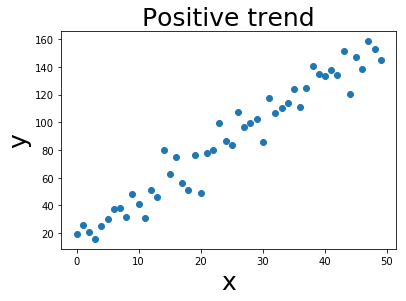

In [2]:
x = np.arange(0,50)
y = 10 + 3*x + np.random.normal(0, 10, 50)
plt.xlabel("x", fontsize=25)
plt.ylabel("y", fontsize=25)
plt.title("Positive trend",fontsize=25)
plt.scatter(x, y)
plt.show()

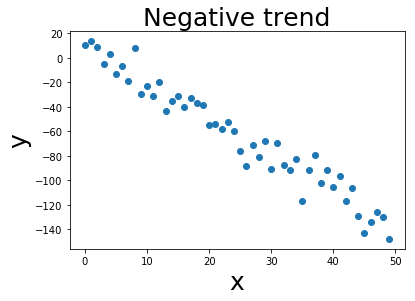

In [4]:
x = np.arange(0,50)
y = 10 - 3*x + np.random.normal(0, 10, 50)
plt.xlabel("x", fontsize=25)
plt.ylabel("y", fontsize=25)
plt.title("Negative trend",fontsize=25)
plt.scatter(x, y)
plt.show()

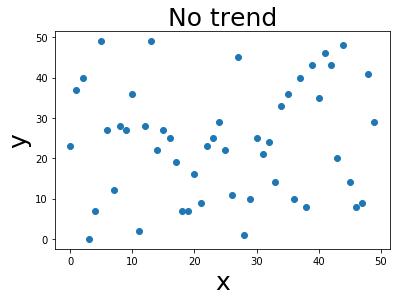

In [5]:
x = np.arange(0,50)
y = np.random.randint(0,50, 50)
plt.xlabel("x", fontsize=25)
plt.ylabel("y", fontsize=25)
plt.title("No trend",fontsize=25)
plt.scatter(x, y)
plt.show()

For statistical relationships with a trend, we can graph a line that best fits the points. This line is literally called the **line of best fit**, a very fitting name indeed. This line may not necessarily hit all the points in the graph, but it will be pretty close, depending on how strong the trend is. 

To understand the formula for the line of best fit, we must learn some terminology.

* x<sub>i</sub> is an individual predictor value 
* y<sub>i</sub> is an individual observed response value (the "actual" value)
* ŷ<sub>i</sub> is an indididual predicted response values ("the "fitted" value)

(x<sub>i</sub>, y<sub>i</sub>) = actual data point for a given x<sub>i</sub>

(x<sub>i</sub>, ŷ<sub>i</sub>) = predicted data point for a given x<sub>i</sub>


___


The formula for the line of best fit is ŷ<sub>i</sub> = b<sub>0</sub> + b<sub>1</sub> * x<sub>i</sub>

* b<sub>0</sub> is the ŷ-intercept (value when x is 0)
* b<sub>1</sub> is the slope of the line of best fit

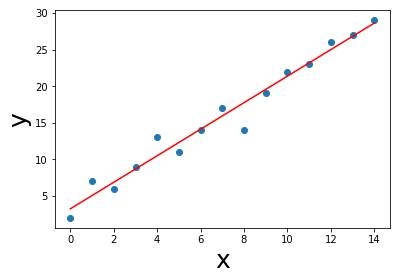

In [6]:
x = np.arange(0,15)
y = np.array([2,7,6,9,13,11,14,17,14,19,22,23,26,27,29])
plt.xlabel("x", fontsize=25)
plt.ylabel("y", fontsize=25)
plt.scatter(x, y)

params = np.polyfit(x,y,1)
slope = params[0]
y_intercept = params[1]

# best fit line
y_hat = y_intercept+slope*x

plt.plot(x, y_hat, color="red")

print()
plt.show()

### Ordinary Least Squares 
So how does np.polyfit work? 

There are several ways to fit a set of data points and create a line of best fit. We'll focus on the method of **ordinary least squares (OLS) ** to figure out the slope and y-intercept of the best fit line.

To understand OLS, we have to first understand the **residual error**, which is the difference between the observed response and predicted response. 

e<sub>i</sub> = y<sub>i</sub>- ŷ<sub>i</sub> 

Residual is: -3.74761904762


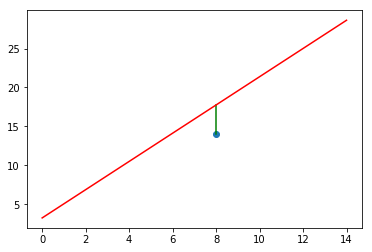

In [10]:
plt.scatter([8],[14])
plt.plot([8,8], [14,y_hat[8]], color="green")
plt.plot(x, y_hat, color="red")
print("Residual is: " + str(14-y_hat[8]))
plt.show()

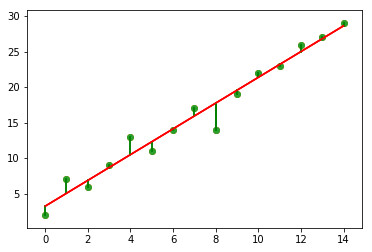

In [9]:
plt.scatter(x,y)
residuals = np.array([])
for i in range(15):
    plt.plot([i,i], [y[i],y_hat[i]], color="green")
    np.append(residuals, y[i]-y_hat[i])
plt.plot(x, y_hat, color="red")
plt.show()

What we really want to do for OLS is minimize the sum of the squares of the residual residuals (SSE). This is bascially minimizing the errors, so the line is really best fit.

SSE = Σ [(y<sub>i</sub> - ŷ<sub>i</sub>)<sup>2</sup>] = Σ (e<sub>i</sub>)<sup>2</sup>

We use squared errors because 
 1. Everything is positive (squares are always positive)
 2. It imposes a "penalty" for larger errors
     * A residual that is of size 2 has a penalty of 4
     * A residual that is of size 3 has a penalty of 9
     * Though 3 is one unit away from 2, the penalty for 3 is much stronger than that of 2
 
 
With OLS, we can derive formulas to find the slope and y-intercept for the best-fitting line. 

b<sub>1</sub> = Σ [(x<sub>i</sub>-x̅)*(y<sub>i</sub>-ȳ)] /  Σ (x<sub>i</sub>-x̅)<sup>2</sup>

b<sub>0</sub> = ȳ - b<sub>1</sub> * x̅


Here's the derivation for the formulas if you are interested. You will need to have a good understanding of calculus: [proof](https://isites.harvard.edu/fs/docs/icb.topic515975.files/OLSDerivation.pdf) 
    
___

### Exercise
Let's get back to coding! 
In the Week 4 folder, check out the Excel file called "crickets", which I got from this [site](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html). Figure out what the appropriate x and y variables are, graph the relationship (label your axes please!), and state the formula for line of best fit in the title. 

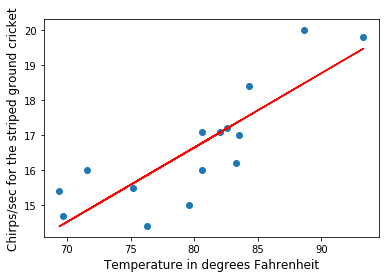

In [27]:
import pandas as pd
chirps = pd.read_excel('/Users/stellasotos/Documents/node/Week_4_Regression/crickets.xlsx')
x = chirps.iloc[:,1]
y = chirps.iloc[:,0]
plt.ylabel("Chirps/sec for the striped ground cricket", fontsize=12)
plt.xlabel("Temperature in degrees Fahrenheit", fontsize=12)
plt.scatter(x, y)

params = np.polyfit(x,y,1)
slope = params[0]
y_intercept = params[1]

# best fit line
y_hat = y_intercept+slope*x

plt.plot(x, y_hat, color="red")

print()
plt.show()

### Coefficient of Determination (r<sup>2 </sup>)
In many cases, we have to know how strongly (or weakly) the best fit line fits the data. We can quantify how strong the regression line fits the data using the coefficient of determination, also known as r<sup>2</sup>.

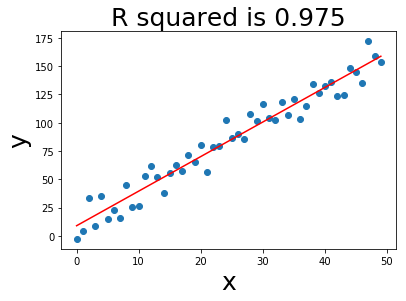

In [28]:
# You may need to pip install scipy
from scipy import stats

x = np.arange(0,50)
y = 10 + 3*x + np.random.normal(0, 10, 50)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
r_squared = stats.linregress(x,y)[2]

plt.xlabel("x", fontsize=25)
plt.ylabel("y", fontsize=25)
plt.title("R squared is "+'{:.3f}'.format(r_squared),fontsize=25)
plt.scatter(x, y)

params = np.polyfit(x,y,1)
slope = params[0]
y_intercept = params[1]

y_hat = y_intercept+slope*x

# best fit line
plt.plot(x, y_hat, color="red")


plt.show()

![alt text](https://image.slidesharecdn.com/linearregression-140903114216-phpapp01/95/linear-regression-22-638.jpg?cb=1409744639)
[Source](https://image.slidesharecdn.com/linearregression-140903114216-phpapp01/95/linear-regression-22-638.jpg?cb=1409744639) 

Coefficient of Determination (r<sup>2</sup>) : 
** r<sup>2</sup> = 1 - (SSE / SSTO) **
* The range of r<sup>2</sup> is between 0 and 1
* If r<sup>2</sup> is 1, then variation in y is *totally* accounted by the x-variable
    * All data lies perfectly on the best-fit line
* If r<sup>2</sup> is 0, then variation in y is *not at all* accounted by the x-variable
    * The regression line is horizontal 
* **Interpretation** 
    * "r<sup>2</sup> ×100 percent of the variation in y is 'explained by' the variation in predictor x."
        * Remember ***correlation does not imply causation***
    * "r<sup>2</sup> ×100 percent of the variation in y is reduced by taking into account predictor x"

Correlation Coefficient (r):
* Measure of the linear correlation between two variables, x and y
* r = +/- Sqrt(r<sup>2</sup>)
    * Sign depends on the slope of regression line
        * If the slope is positive, then r is positive.
        * If the slope is negative, then r is negative.
    * Range of r is between -1 and 1



### Key Assumptions for Linear Regression
1. Data must be linearly related. 
    * The graph should look linear. No curves.
    * Mean of e<sub>i</sub> is 0
2. The errors are independent
3. Errors are normally distributed
4. Errors have constant variance 


## Application of Regression in ML
Code source adapted from [SKLearn Example](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html) 
Data source: [Car MPG Analysis](https://archive.ics.uci.edu/ml/datasets/auto+mpg) 


In [29]:
import pandas as pd
auto_data = pd.read_csv("auto_data.csv")
print(auto_data.head())
print()
print("The shape of the data is: " + str(auto_data.shape))

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model year  origin                         car name  
0          70       1  "chevrolet chevelle malibu"      
1          70       1          "buick skylark 320"      
2          70       1        "plymouth satellite"       
3          70       1              "amc rebel sst"      
4          70       1               "ford torino"       

The shape of the data is: (392, 9)


### Can we predict mpg from weight? 
Let weight be the predictor (x) and mpg be the response (y). 

We're also going to pretend that we don't have all the data. We want to predict 20% of our data using 80% as a training set.

R squared value is: 0.72


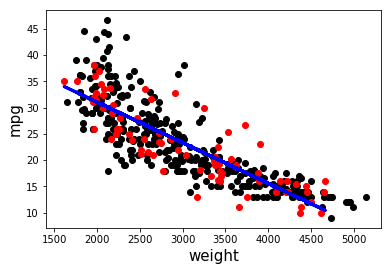

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Randomize and split our data
train, test = train_test_split(auto_data, test_size = 0.2)

train_x = train[['weight']]
train_y = train[['mpg']]

test_x = test[['weight']]
test_y = test[['mpg']]

# Create linear regression object
regr = LinearRegression()

# Train the model ('fit' synonomous to 'train')
regr.fit(train_x, train_y)

plt.scatter(train_x, train_y,  color='black')
plt.scatter(test_x, test_y,  color='red')

# predicted best-fit line in blue
plt.plot(test_x, regr.predict(test_x), color='blue',
         linewidth=3)

plt.xlabel("weight", fontsize=15)
plt.ylabel("mpg", fontsize=15)

print('R squared value is: %.2f' % r2_score(test_y, regr.predict(test_x)))
plt.show()


How would you interpret the r<sup>2</sup> value? 